In [2]:
# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 
#if you're working in a Jupyter notebook



In [11]:

# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df = df[df['Country'].isin(countries)]

# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [13]:
df



,Date,Country,Confirmed,Recovered,Deaths,Cases
32,2020-01-22,Canada,0,0,0,0
36,2020-01-22,China,548,28,17,593
62,2020-01-22,France,0,0,0,0
66,2020-01-22,Germany,0,0,0,0
174,2020-01-22,US,1,0,0,1
...,...,...,...,...,...,...
24476,2020-05-31,China,84146,79389,4638,168173
24502,2020-05-31,France,189009,68473,28805,286287
24506,2020-05-31,Germany,183410,165352,8540,357302
24614,2020-05-31,US,1790172,444758,104381,2339311


In [5]:
#pwd

'/home/madalaj/PHC-639/programs'

In [6]:
#cd ../output

/home/madalaj/PHC-639/output


In [7]:
#df.to_csv (r'/home/madalaj/PHC-639/output/countries-aggregated.csv', index = False, header=True)


In [8]:
#print(df)

            Date         Country  Confirmed  Recovered  Deaths    Cases
32    2020-01-22          Canada          0          0       0        0
36    2020-01-22           China        548         28      17      593
62    2020-01-22          France          0          0       0        0
66    2020-01-22         Germany          0          0       0        0
174   2020-01-22              US          1          0       0        1
...          ...             ...        ...        ...     ...      ...
24476 2020-05-31           China      84146      79389    4638   168173
24502 2020-05-31          France     189009      68473   28805   286287
24506 2020-05-31         Germany     183410     165352    8540   357302
24614 2020-05-31              US    1790172     444758  104381  2339311
24618 2020-05-31  United Kingdom     276156       1190   38571   315917

[786 rows x 6 columns]


In [14]:
# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

# Section 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

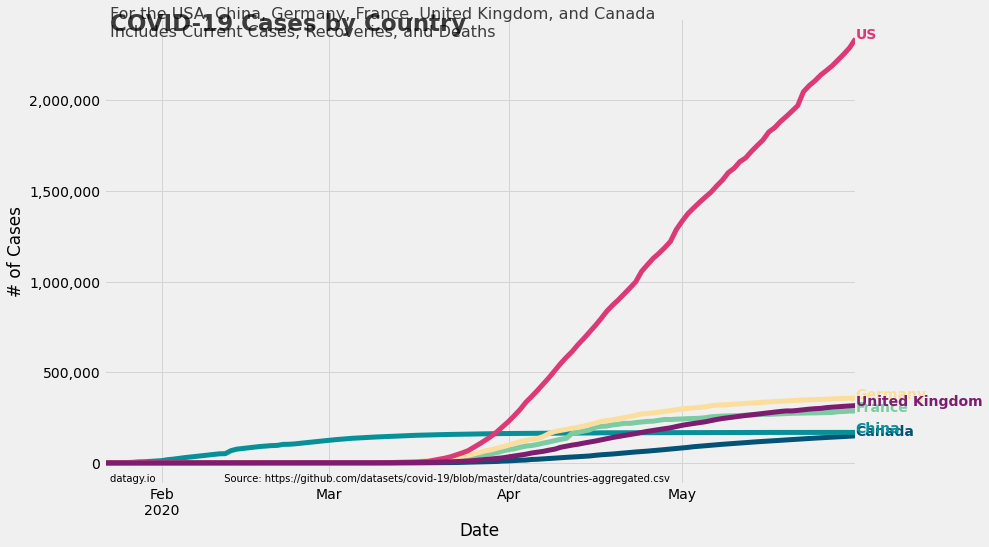

In [15]:
# Section 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)